# Step 1: Import Libraries

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure default styles for visualizations
sns.set(style="whitegrid")

# Step 2: Load Data

In [93]:
df=pd.read_excel(r"D:\pune_weather1.xlsx")

In [95]:
df

,date,Temperature,Humidity,Rainfall,Region
0,2023-01-01 00:00:00,21.583333,48.916667,7.640373,South
1,2023-01-02 00:00:00,21.583333,53.375000,11.224846,North
2,2023-01-03 00:00:00,21.166667,54.416667,9.301336,West
3,2023-01-04 00:00:00,20.500000,56.666667,9.100463,East
4,2023-01-05 00:00:00,21.208333,56.041667,10.717095,North
...,...,...,...,...,...
796,2025-03-07 00:00:00,28.500000,24.083333,8.943033,South
797,2025-03-08 00:00:00,28.375000,25.875000,7.916163,East
798,2025-03-09 00:00:00,27.916667,32.541667,10.883896,West
799,2025-03-10 00:00:00,27.708333,31.666667,8.232485,North


In [7]:
# Display the first few rows of the dataset to understand its structure
df.head()

,date,Temperature,Humidity,Rainfall
0,2023-01-01 00:00:00,21.583333,48.916667,7.640373
1,2023-01-02 00:00:00,21.583333,53.375000,11.224846
2,2023-01-03 00:00:00,21.166667,54.416667,9.301336
3,2023-01-04 00:00:00,20.500000,56.666667,9.100463
4,2023-01-05 00:00:00,21.208333,56.041667,10.717095


In [97]:
# Display the first few rows of the dataset to understand its structure
df.tail()

,date,Temperature,Humidity,Rainfall,Region
796,2025-03-07 00:00:00,28.500000,24.083333,8.943033,South
797,2025-03-08 00:00:00,28.375000,25.875000,7.916163,East
798,2025-03-09 00:00:00,27.916667,32.541667,10.883896,West
799,2025-03-10 00:00:00,27.708333,31.666667,8.232485,North
800,2025-03-11 00:00:00,28.625000,28.708333,10.065176,West


# Step 3: Missing Value

In [99]:
# Check for missing values in the dataset
print(df.isnull().sum())

# Handle missing values by forward filling (ffill)
df.ffill(inplace=True)  # This replaces fillna(method='ffill')

# Alternatively, fill missing values with the column mean (if needed)
# weather_data.fillna(weather_data.mean(), inplace=True)

# Display the cleaned dataset
print(df.head())


date           0
Temperature    0
Humidity       0
Rainfall       0
Region         1
dtype: int64
                  date  Temperature   Humidity   Rainfall  Region
0  2023-01-01 00:00:00    21.583333  48.916667   7.640373  South 
1  2023-01-02 00:00:00    21.583333  53.375000  11.224846  North 
2  2023-01-03 00:00:00    21.166667  54.416667   9.301336    West
3  2023-01-04 00:00:00    20.500000  56.666667   9.100463    East
4  2023-01-05 00:00:00    21.208333  56.041667  10.717095  North 


# Step 4: Plot Basic Charts

##  Line Chart 

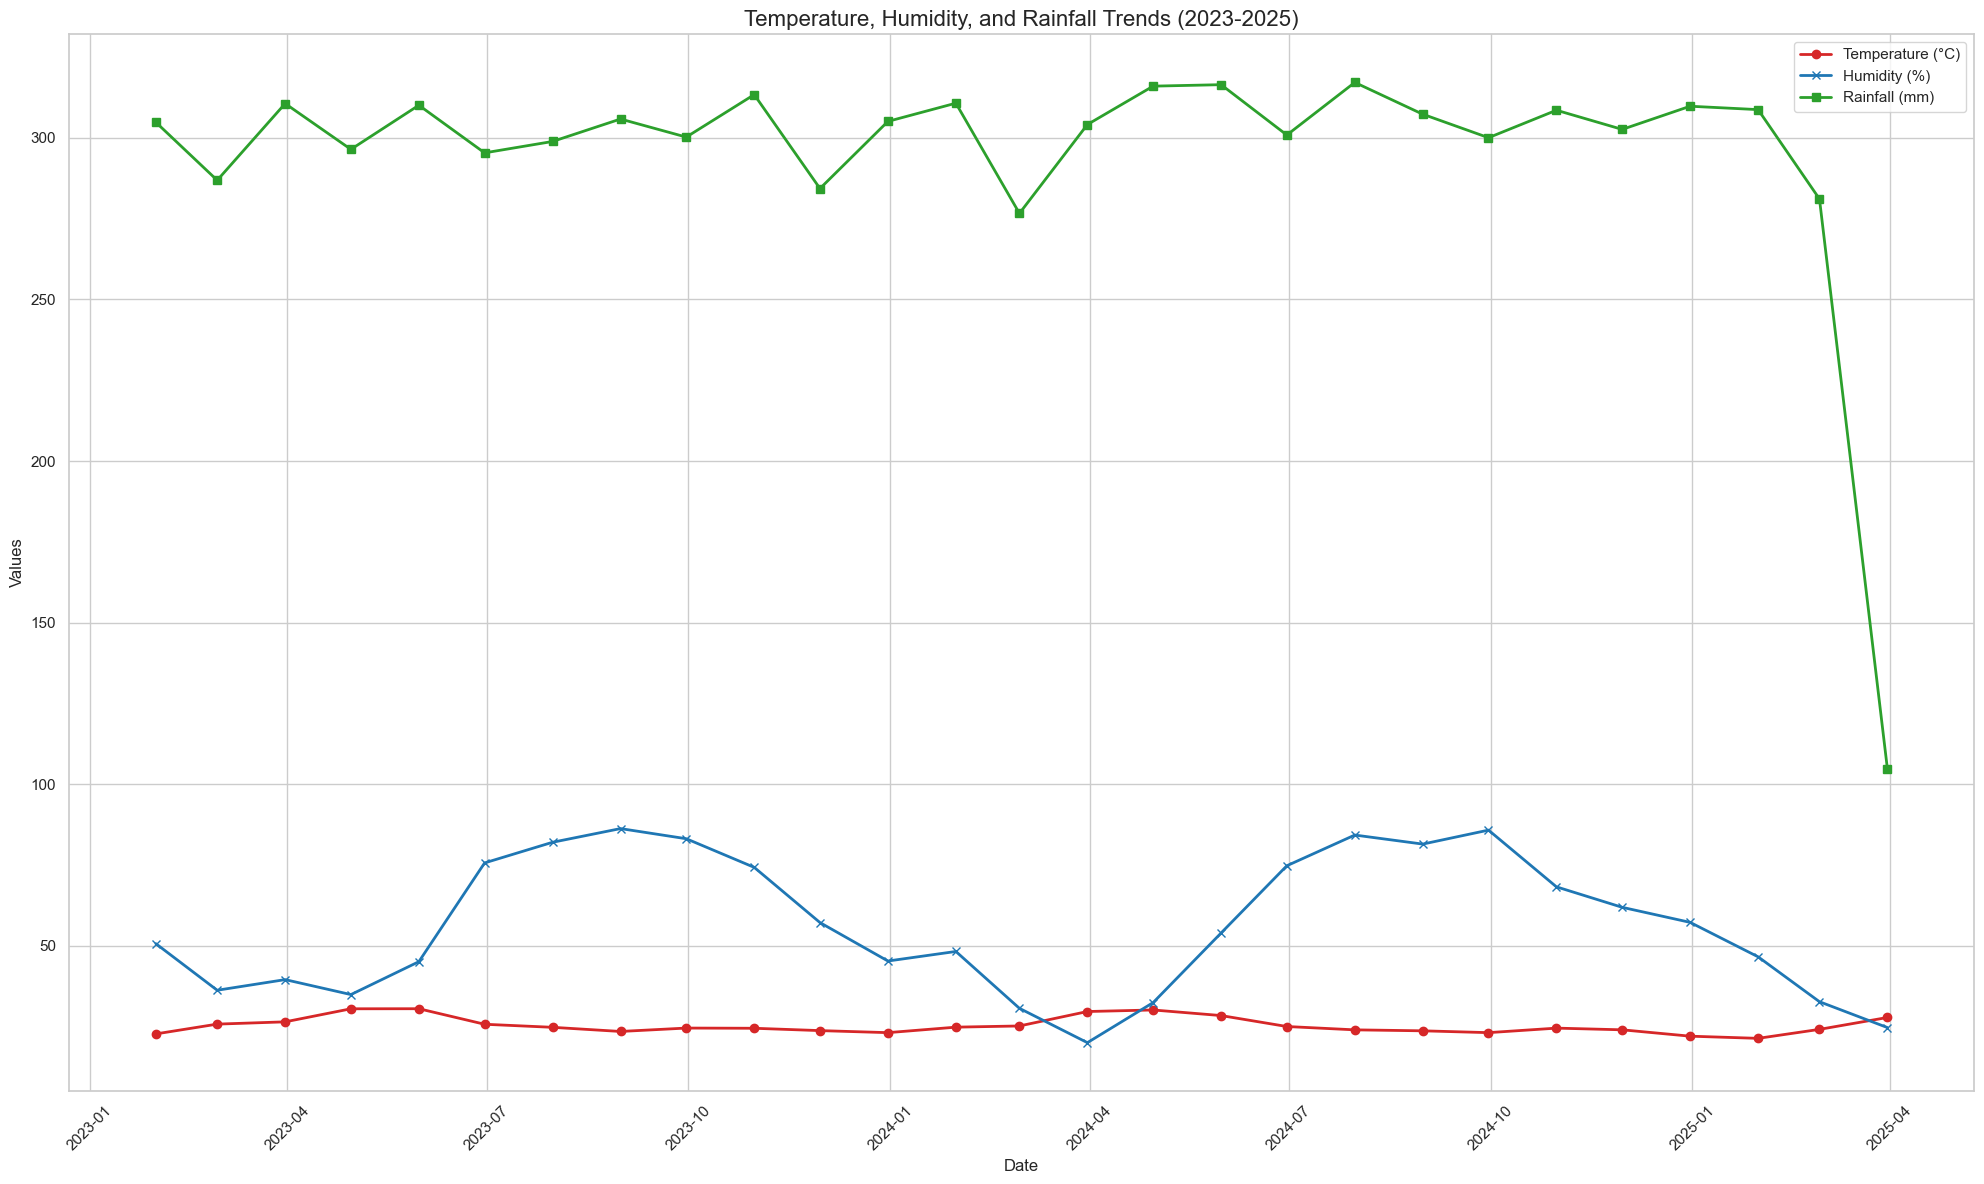

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
df = pd.read_excel(r"D:\pune_weather1.xlsx")

# Convert 'date' column to datetime type, coercing errors (invalid dates)
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Drop rows with invalid or missing 'date'
df = df.dropna(subset=['date'])

# Filter data for years 2023, 2024, and 2025
df = df[df['date'].dt.year.isin([2023, 2024, 2025])]

# Aggregating monthly data (optional, if you need to plot monthly data)
monthly_aggregated_data = df.resample('ME', on='date').agg({
    'Temperature': 'mean',  # Assuming you want monthly averages
    'Humidity': 'mean',
    'Rainfall': 'sum'  # Assuming you want total rainfall per month
}).reset_index()

# Plotting the data on one graph
plt.figure(figsize=(20, 12))

# Plot Temperature, Humidity, and Rainfall
plt.plot(monthly_aggregated_data['date'], monthly_aggregated_data['Temperature'], 
         label='Temperature (°C)', color='tab:red', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(monthly_aggregated_data['date'], monthly_aggregated_data['Humidity'], 
         label='Humidity (%)', color='tab:blue', marker='x', linestyle='-', linewidth=2, markersize=6)
plt.plot(monthly_aggregated_data['date'], monthly_aggregated_data['Rainfall'], 
         label='Rainfall (mm)', color='tab:green', marker='s', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.xlabel('Date', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.title('Temperature, Humidity, and Rainfall Trends (2023-2025)', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add grid and legend
plt.grid(True)
plt.legend(fontsize=11)

# Adjust layout for tightness
plt.tight_layout()

# Show the plot
plt.show()


## Bart Chart

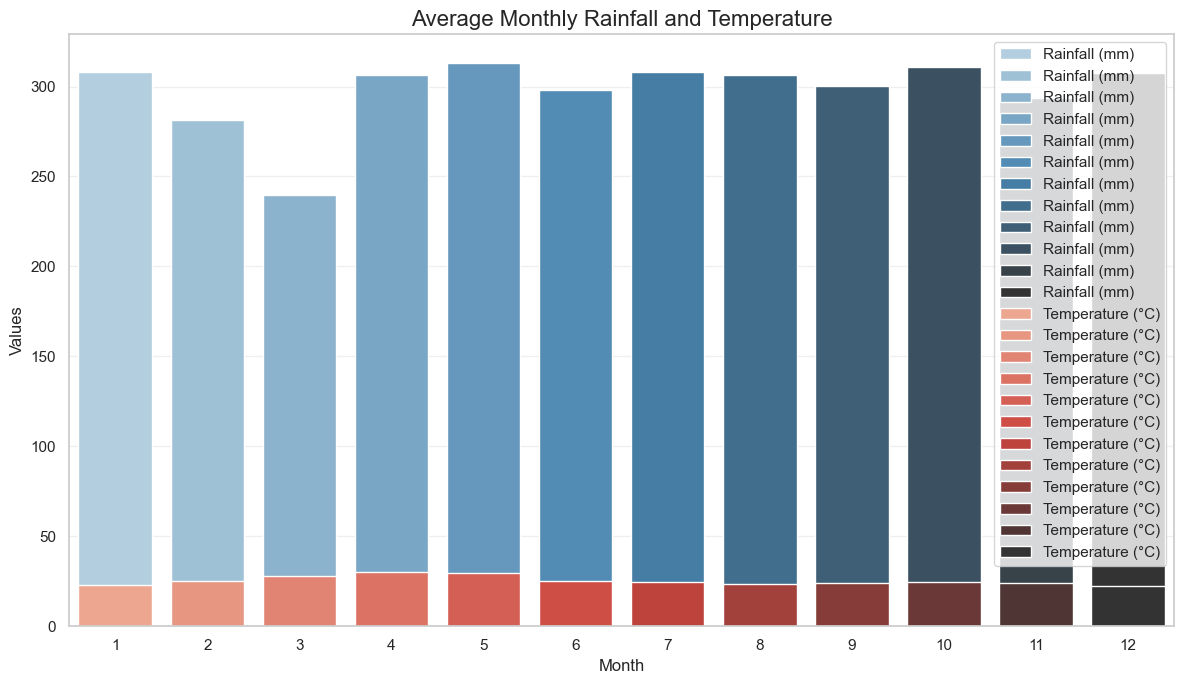

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

monthly_aggregated_data = df.resample('ME', on='date').agg({
    'Temperature': 'mean',
    'Rainfall': 'sum'
}).reset_index()

monthly_aggregated_data['month'] = monthly_aggregated_data['date'].dt.month

plt.figure(figsize=(12, 7))

sns.barplot(x='month', y='Rainfall', data=monthly_aggregated_data, 
            palette="Blues_d", hue='month', errorbar=None, label='Rainfall (mm)', legend=False)

sns.barplot(x='month', y='Temperature', data=monthly_aggregated_data, 
            palette="Reds_d", hue='month', errorbar=None, label='Temperature (°C)', legend=False)

plt.title('Average Monthly Rainfall and Temperature', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Values', fontsize=12)

plt.legend()

plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


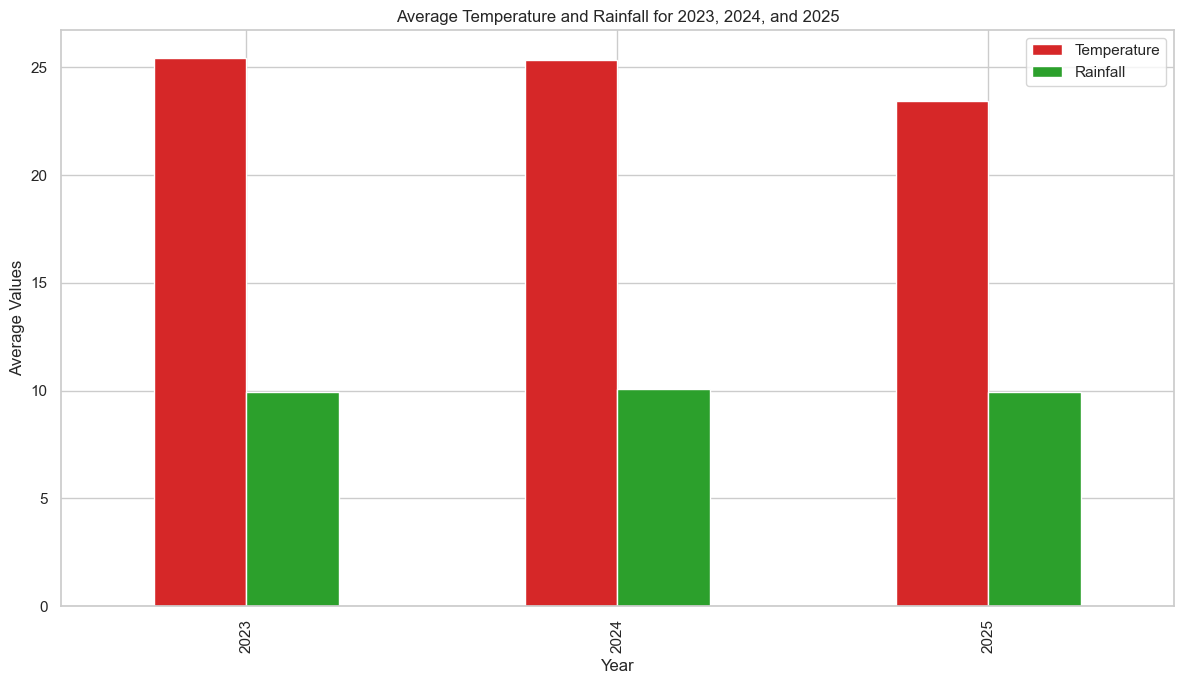

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df_filtered = df[df['date'].dt.year.isin([2023, 2024, 2025])]

if df_filtered.empty:
    print("No data available for 2023, 2024, and 2025.")
else:
    avg_weather_by_year = df_filtered.groupby(df['date'].dt.year)[['Temperature', 'Rainfall']].mean()

    avg_weather_by_year.plot(kind='bar', figsize=(12, 7), color=['tab:red', 'tab:green'])

    plt.xlabel('Year')
    plt.ylabel('Average Values')
    plt.title('Average Temperature and Rainfall for 2023, 2024, and 2025')

    plt.tight_layout()
    plt.show()


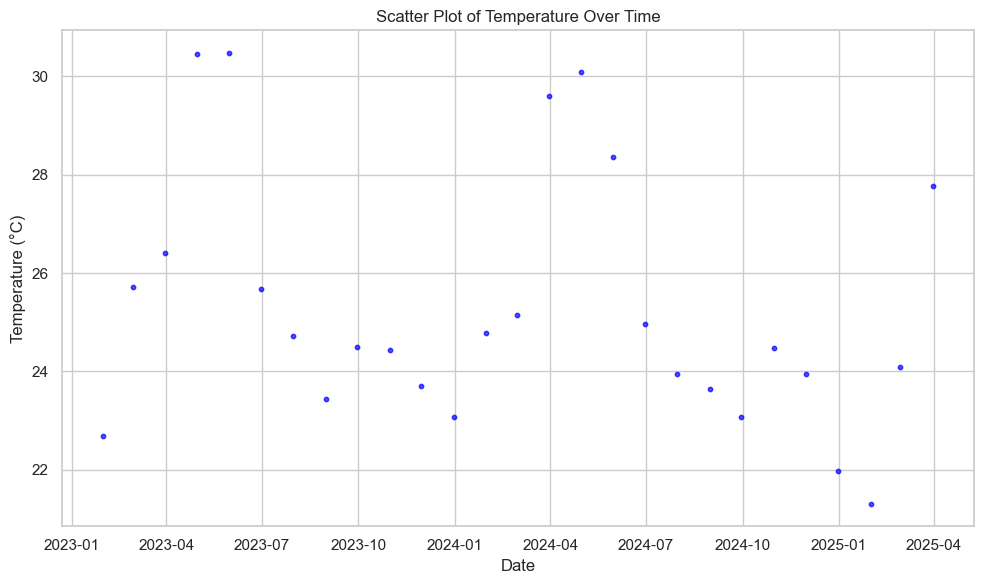

In [199]:
##Scatter Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(monthly_aggregated_data['date'], monthly_aggregated_data['Temperature'], s=10, alpha=0.7, c='blue')

# Labeling the axes
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Scatter Plot of Temperature Over Time')

# Display the plot
plt.tight_layout()
plt.show()


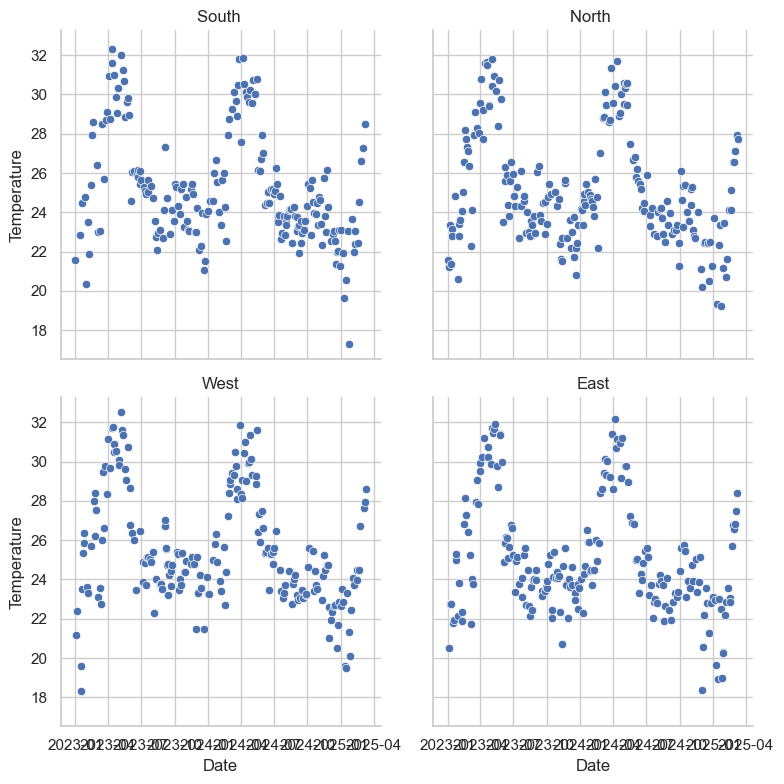

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out the "mn" region if it exists in the 'Region' column
df_filtered = df[df['Region'] != 'mn']

g = sns.FacetGrid(df_filtered, col='Region', col_wrap=2, height=4, sharey=True)
g.map(sns.scatterplot, 'date', 'Temperature')

g.set_titles('{col_name}')
g.set_axis_labels('Date', 'Temperature')

plt.tight_layout()
plt.show()


# Step 5: Average ,Min ,Max

In [62]:
import pandas as pd

# Assuming the dataset is already loaded into a DataFrame named 'df'
# Example: df = pd.read_csv('your_data.csv')

# Convert 'date' column to datetime type if it's not already
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Calculate Average, Min, and Max for each weather attribute
average_temperature = df['Temperature'].mean()
min_temperature = df['Temperature'].min()
max_temperature = df['Temperature'].max()

average_humidity = df['Humidity'].mean()
min_humidity = df['Humidity'].min()
max_humidity = df['Humidity'].max()

average_rainfall = df['Rainfall'].mean()
min_rainfall = df['Rainfall'].min()
max_rainfall = df['Rainfall'].max()

# Print the results
print(f"Temperature (°C) - Average: {average_temperature:.2f}, Min: {min_temperature:.2f}, Max: {max_temperature:.2f}")
print(f"Humidity (%) - Average: {average_humidity:.2f}, Min: {min_humidity:.2f}, Max: {max_humidity:.2f}")
print(f"Rainfall (mm) - Average: {average_rainfall:.2f}, Min: {min_rainfall:.2f}, Max: {max_rainfall:.2f}")


Temperature (°C) - Average: 25.21, Min: 17.29, Max: 32.50
Humidity (%) - Average: 56.98, Min: 10.58, Max: 95.42
Rainfall (mm) - Average: 9.98, Min: 6.21, Max: 14.03


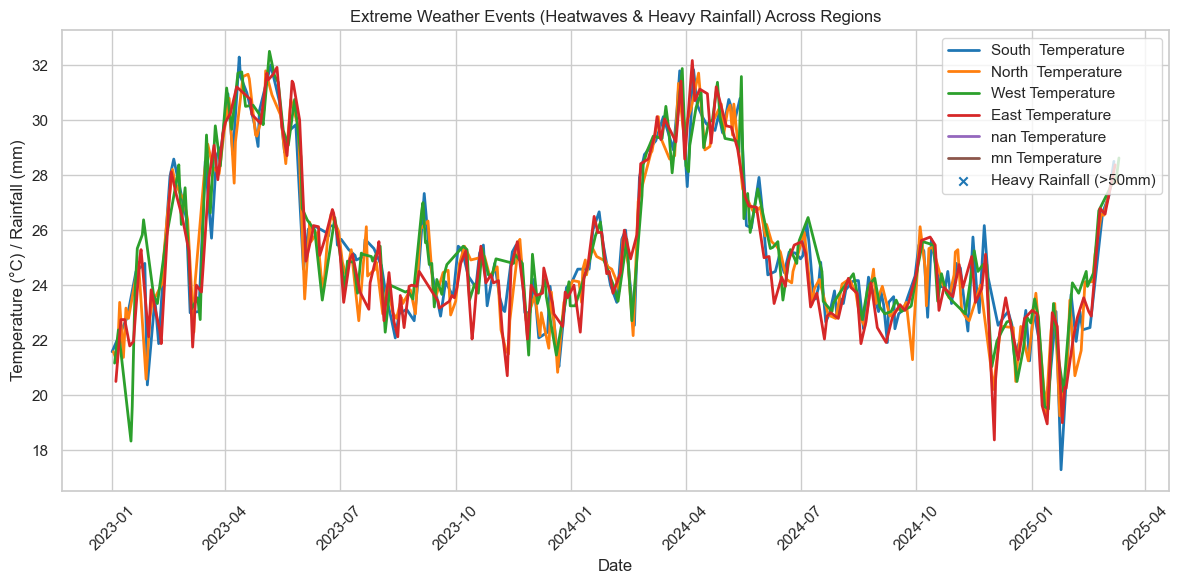

In [197]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

HEATWAVE_THRESHOLD = 35
HEAVY_RAINFALL_THRESHOLD = 50

heatwave_dates = df[df['Temperature'] > HEATWAVE_THRESHOLD]
heavy_rainfall_dates = df[df['Rainfall'] > HEAVY_RAINFALL_THRESHOLD]

plt.figure(figsize=(12, 6))
regions = df['Region'].unique()

colors = sns.color_palette("tab10", len(regions))
for i, region in enumerate(regions):
    region_data = df[df['Region'] == region]
    plt.plot(region_data['date'], region_data['Temperature'], label=f'{region} Temperature', color=colors[i], linewidth=2)

plt.scatter(heavy_rainfall_dates['date'], heavy_rainfall_dates['Rainfall'], color='tab:blue', label='Heavy Rainfall (>50mm)', marker='x')

for start, end in zip(heatwave_dates['date'], heatwave_dates['date'][1:]):
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Heatwave')

plt.xlabel('Date')
plt.ylabel('Temperature (°C) / Rainfall (mm)')
plt.title('Extreme Weather Events (Heatwaves & Heavy Rainfall) Across Regions')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(loc='best')
plt.tight_layout()
plt.show()


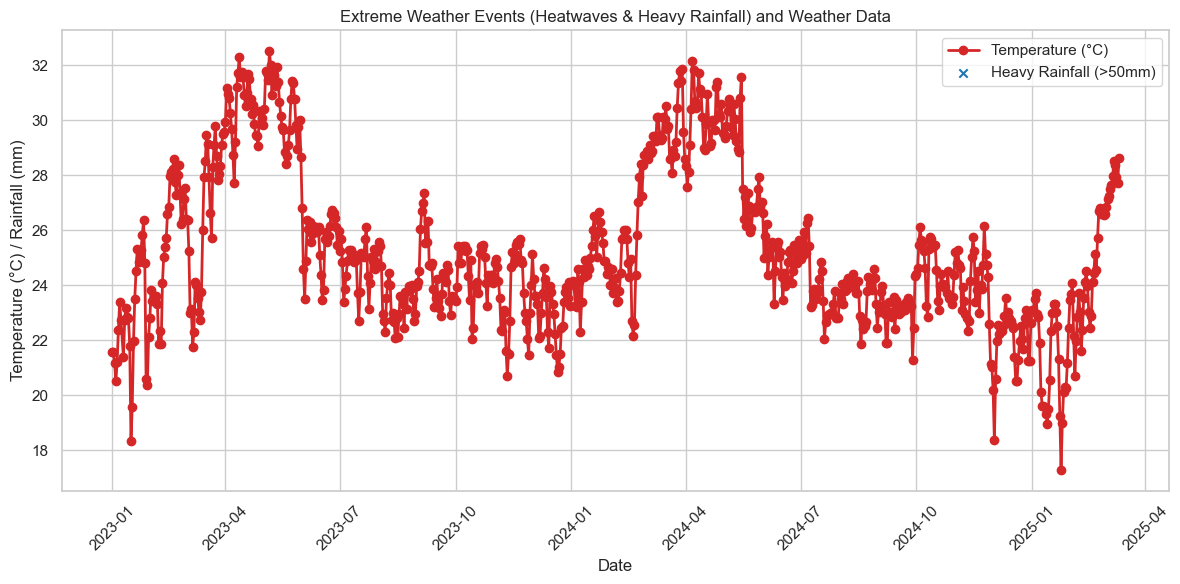

In [187]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

HEATWAVE_THRESHOLD = 35
HEAVY_RAINFALL_THRESHOLD = 50

heatwave_dates = df[df['Temperature'] > HEATWAVE_THRESHOLD]
heatwave_periods = []

for i in range(1, len(heatwave_dates)):
    if heatwave_dates['date'].iloc[i] - heatwave_dates['date'].iloc[i-1] == pd.Timedelta(days=1):
        heatwave_periods.append((heatwave_dates['date'].iloc[i-1], heatwave_dates['date'].iloc[i]))

heavy_rainfall_dates = df[df['Rainfall'] > HEAVY_RAINFALL_THRESHOLD]

plt.figure(figsize=(12, 6))

plt.plot(df['date'], df['Temperature'], label='Temperature (°C)', color='tab:red', linewidth=2, marker='o')
plt.scatter(heavy_rainfall_dates['date'], heavy_rainfall_dates['Rainfall'], color='tab:blue', label='Heavy Rainfall (>50mm)', marker='x')

for start, end in heatwave_periods:
    plt.axvspan(start, end, color='orange', alpha=0.3, label='Heatwave Period')

plt.xlabel('Date')
plt.ylabel('Temperature (°C) / Rainfall (mm)')
plt.title('Extreme Weather Events (Heatwaves & Heavy Rainfall) and Weather Data')

plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

plt.tight_layout()

plt.show()


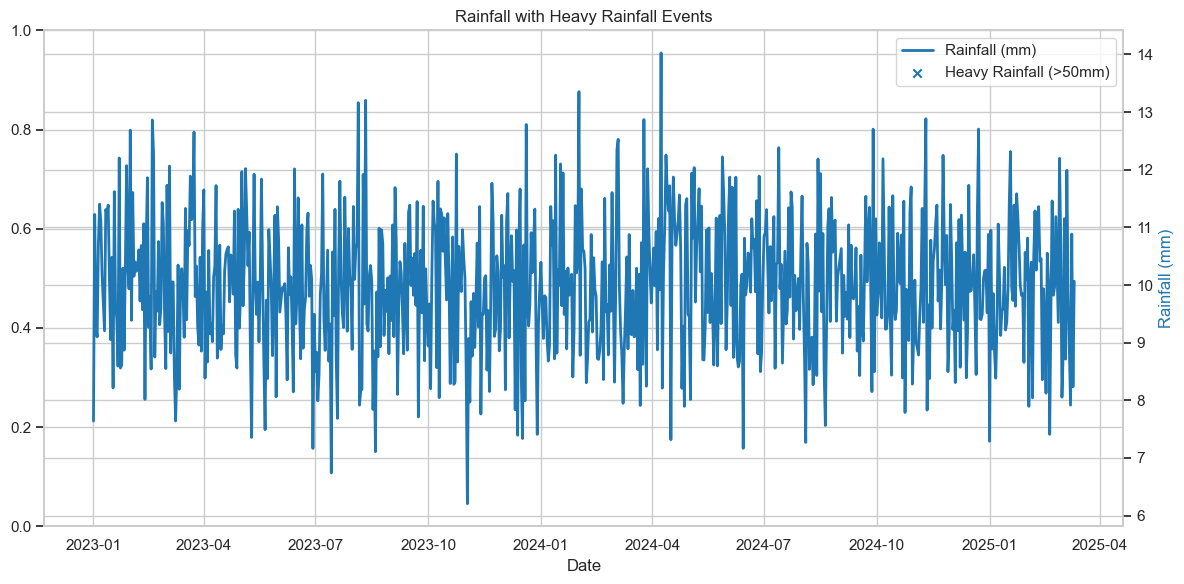

In [183]:

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

HEAVY_RAINFALL_THRESHOLD = 50

heavy_rainfall_dates = df[df['Rainfall'] > HEAVY_RAINFALL_THRESHOLD]

plt.figure(figsize=(12, 6))

ax1 = plt.gca()
ax2 = ax1.twinx()

ax2.plot(df['date'], df['Rainfall'], label='Rainfall (mm)', color='tab:blue', linewidth=2)
ax2.scatter(heavy_rainfall_dates['date'], heavy_rainfall_dates['Rainfall'], color='tab:blue', label='Heavy Rainfall (>50mm)', marker='x')

ax1.set_xlabel('Date')
ax2.set_ylabel('Rainfall (mm)', color='tab:blue')

plt.title('Rainfall with Heavy Rainfall Events')
plt.xticks(rotation=45)

ax1.grid(True)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
